# Extracting features from data

Module 1, Lab 1<br>



In [1]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=32928fa421af52152213671a02ff107b88d3fd9799ba3be2d31e1a9e2e382045
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [2]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [3]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [4]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

[^a-z] - Any character not a lowercase letter,+  - 	One or more of the above

In [5]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [6]:
print(eng1)
print(fr1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeshavebeenthoughtofasonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintofourextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaandindividualspeciescanbedistinguishedbytheirfurcoatpatternssixvalidextinctspeciesofgiraffafromafricaandpakistanareknownfromthefossilrecordthegiraffesdistinguishingcharacteristicsareitsextremelylongneckandlegshornlikeossiconesandspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostothergroundbasedherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupon

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [7]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

here lambda x: x is an anonymous function that takes a tuple x (like ('a', 1)) and returns its first element (the key, e.g., 'a').

So, sorted(combined, key=lambda x: x) sorts all the (key, value) pairs by the key, alphabetically or numerically depending on the type of the keys.

map(list, ...) converts these tuples back into lists

Let us compare the histograms of English pages and French pages. Can you spot a difference?

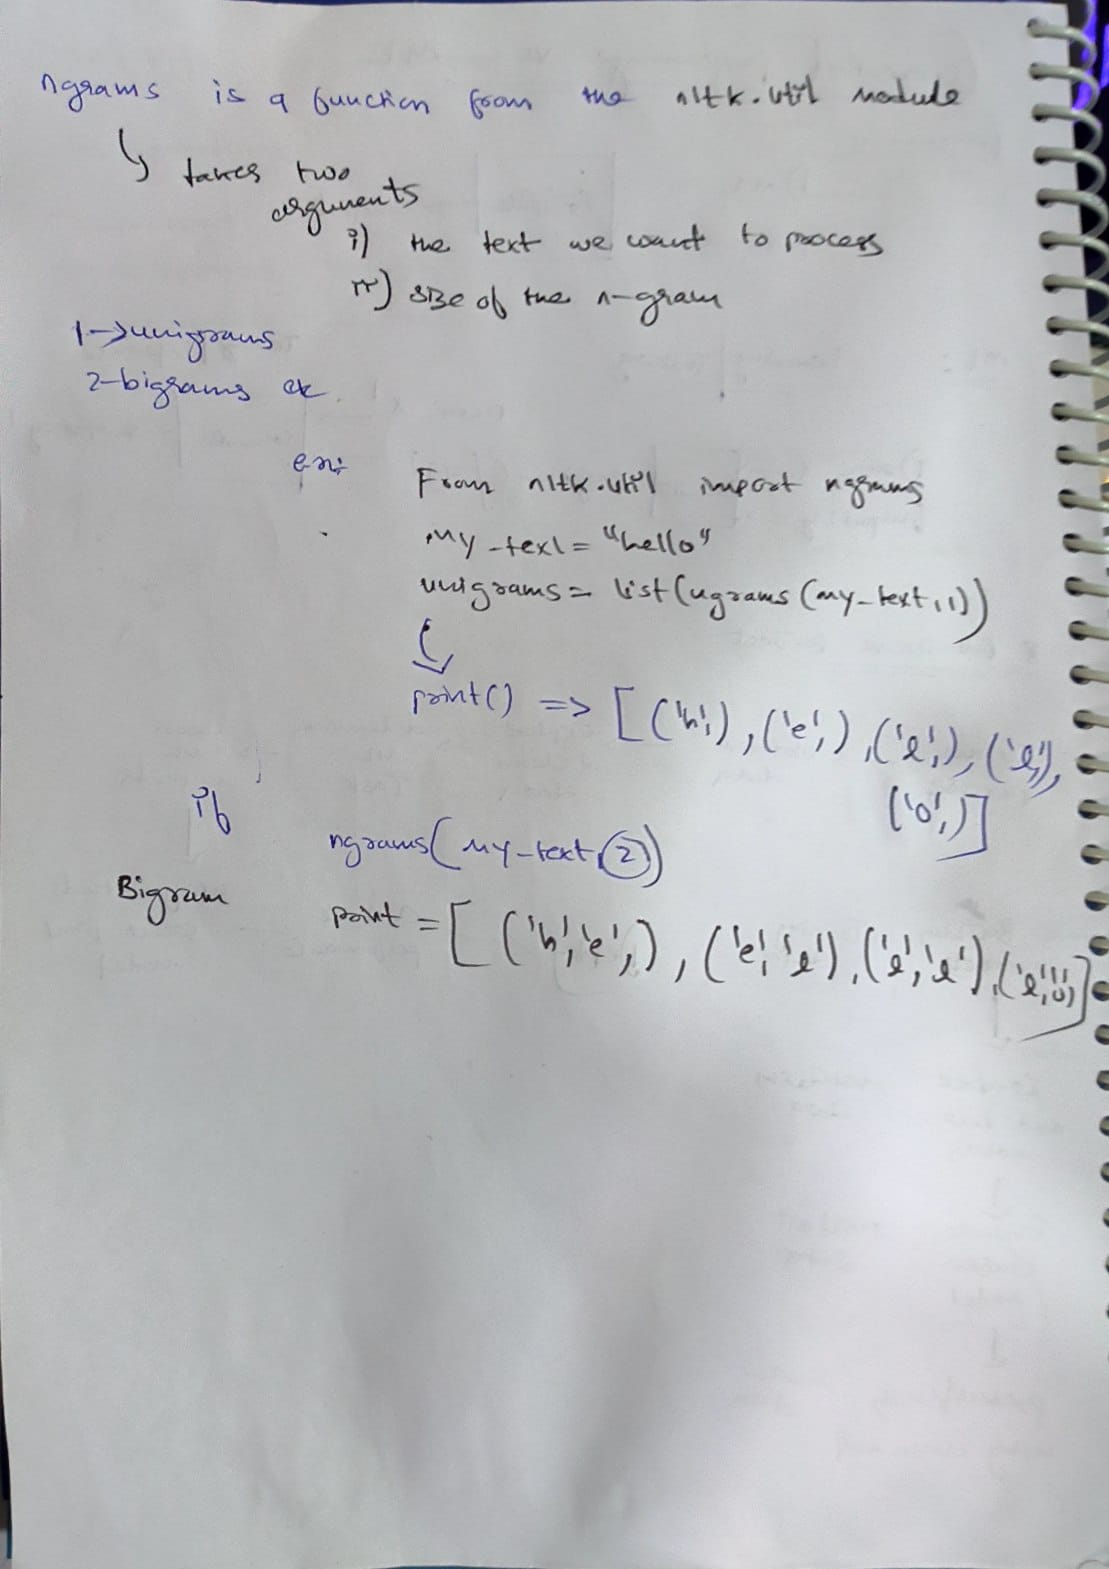

In [8]:
unigram_eng1 =list(ngrams(eng1,1))
print(unigram_eng1)



[('t',), ('h',), ('e',), ('g',), ('i',), ('r',), ('a',), ('f',), ('f',), ('e',), ('i',), ('s',), ('a',), ('l',), ('a',), ('r',), ('g',), ('e',), ('a',), ('f',), ('r',), ('i',), ('c',), ('a',), ('n',), ('h',), ('o',), ('o',), ('f',), ('e',), ('d',), ('m',), ('a',), ('m',), ('m',), ('a',), ('l',), ('b',), ('e',), ('l',), ('o',), ('n',), ('g',), ('i',), ('n',), ('g',), ('t',), ('o',), ('t',), ('h',), ('e',), ('g',), ('e',), ('n',), ('u',), ('s',), ('g',), ('i',), ('r',), ('a',), ('f',), ('f',), ('a',), ('i',), ('t',), ('i',), ('s',), ('t',), ('h',), ('e',), ('t',), ('a',), ('l',), ('l',), ('e',), ('s',), ('t',), ('l',), ('i',), ('v',), ('i',), ('n',), ('g',), ('t',), ('e',), ('r',), ('r',), ('e',), ('s',), ('t',), ('r',), ('i',), ('a',), ('l',), ('a',), ('n',), ('i',), ('m',), ('a',), ('l',), ('a',), ('n',), ('d',), ('t',), ('h',), ('e',), ('l',), ('a',), ('r',), ('g',), ('e',), ('s',), ('t',), ('r',), ('u',), ('m',), ('i',), ('n',), ('a',), ('n',), ('t',), ('o',), ('n',), ('e',), ('a',),

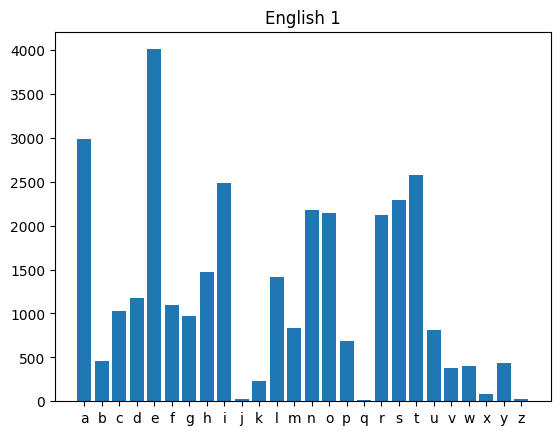

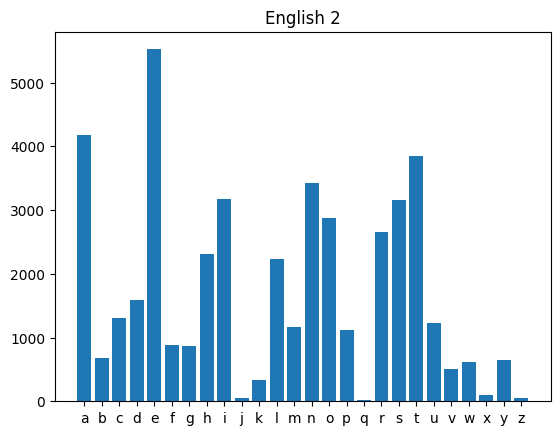

In [9]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

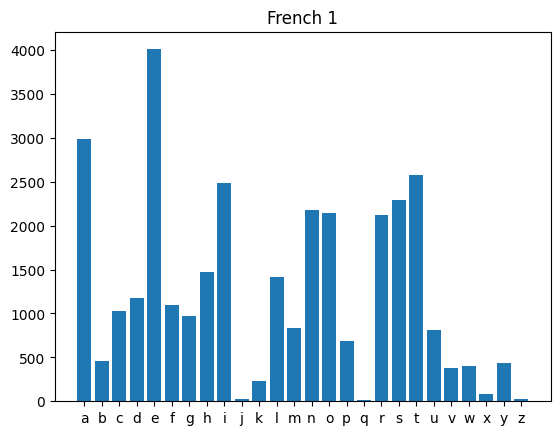

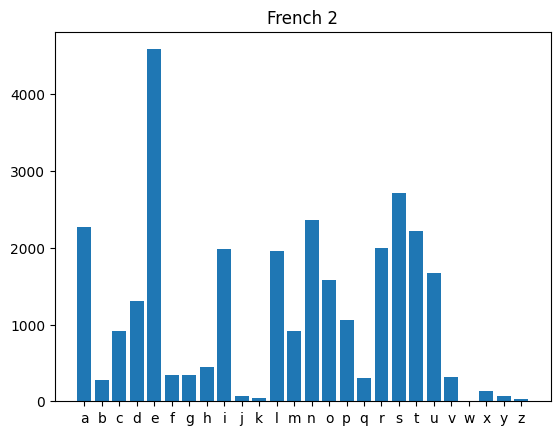

In [10]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

Counter({('t', 'h'): 856, ('h', 'e'): 700, ('e', 's'): 681, ('i', 'n'): 604, ('a', 'n'): 554, ('e', 'r'): 486, ('r', 'e'): 454, ('r', 'a'): 440, ('a', 'l'): 409, ('n', 'd'): 402, ('s', 't'): 376, ('o', 'n'): 374, ('a', 't'): 355, ('e', 'a'): 351, ('n', 'g'): 339, ('e', 'n'): 329, ('t', 'i'): 329, ('a', 'r'): 322, ('i', 'r'): 317, ('n', 't'): 315, ('t', 'e'): 298, ('f', 'e'): 291, ('e', 'd'): 290, ('g', 'i'): 287, ('o', 'r'): 273, ('l', 'e'): 270, ('i', 't'): 267, ('a', 'f'): 262, ('f', 'f'): 260, ('h', 'a'): 259, ('m', 'a'): 251, ('t', 'o'): 249, ('s', 'a'): 246, ('e', 'c'): 246, ('r', 'o'): 246, ('v', 'e'): 237, ('s', 'e'): 237, ('a', 's'): 236, ('i', 's'): 222, ('s', 'i'): 213, ('o', 'f'): 203, ('n', 'e'): 199, ('o', 'u'): 193, ('l', 'a'): 189, ('s', 'o'): 184, ('t', 's'): 181, ('e', 't'): 180, ('c', 'a'): 175, ('l', 'i'): 174, ('n', 'a'): 174, ('c', 'o'): 170, ('i', 'c'): 168, ('r', 'i'): 167, ('i', 'o'): 166, ('o', 'm'): 165, ('e', 'g'): 164, ('e', 'l'): 164, ('l', 'o'): 160, ('d',

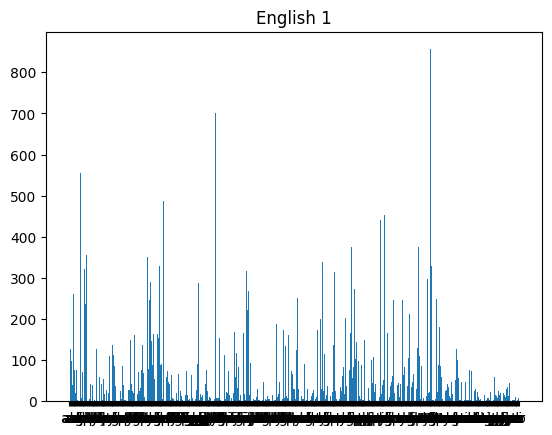

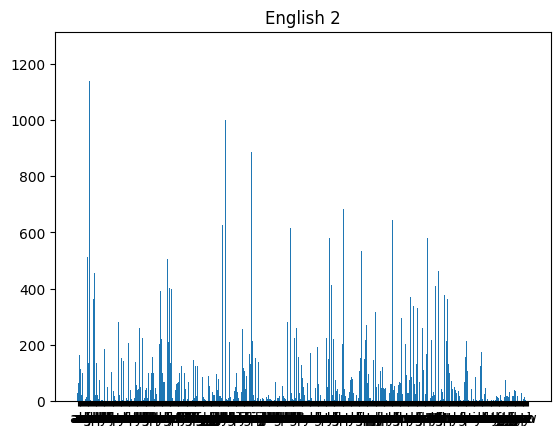

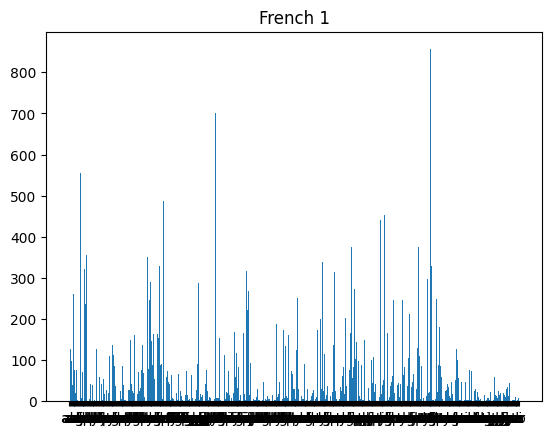

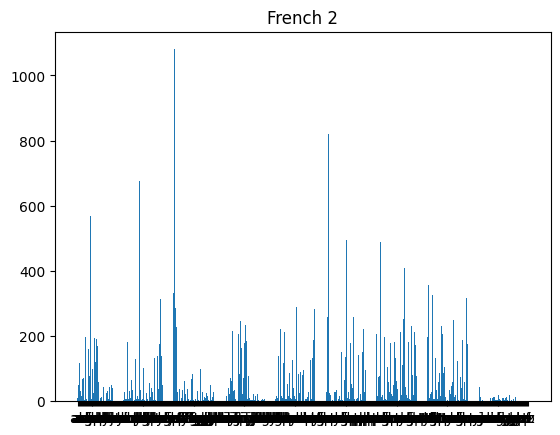

In [11]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
print(bigram_eng1)
print(len(bigram_eng1))
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

ref:
Counter({('t', 'h'): 856, ('h', 'e'): 700, ('e', 's'): 681, ('i', 'n'): 604, ('a', 'n'): 554, ('e', 'r'): 486, ('r', 'e'): 454, ('r', 'a'): 440

In [12]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

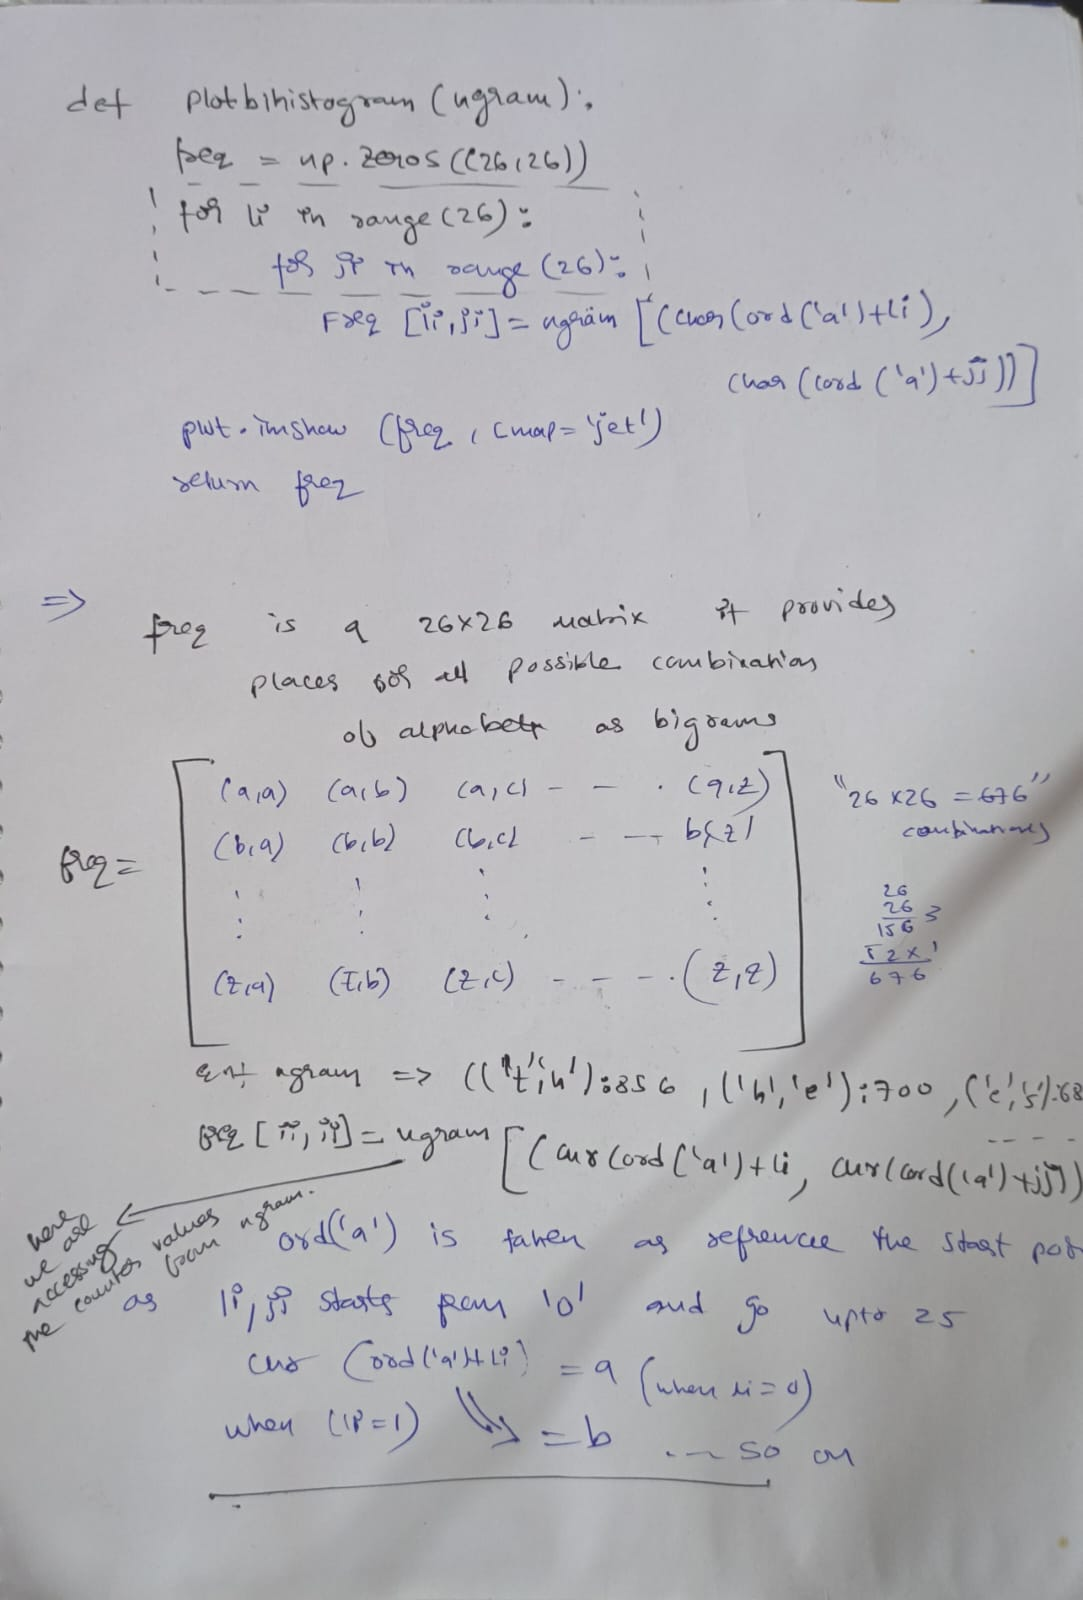

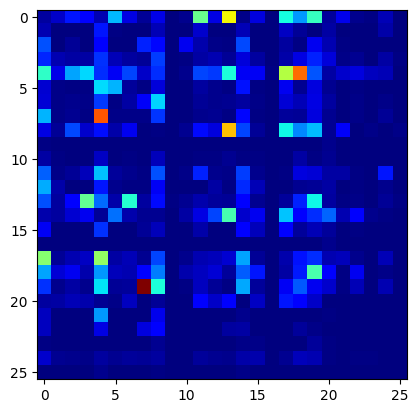

[[3.000e+01 6.500e+01 1.660e+02 1.140e+02 2.300e+01 1.000e+02 7.100e+01
  2.200e+01 1.220e+02 9.000e+00 1.600e+01 5.110e+02 1.350e+02 1.138e+03
  4.000e+00 8.300e+01 1.000e+00 4.750e+02 3.630e+02 4.550e+02 2.300e+01
  1.360e+02 2.100e+01 9.000e+00 7.600e+01 4.000e+00]
 [6.200e+01 3.000e+00 6.000e+00 1.000e+00 1.850e+02 1.000e+00 0.000e+00
  1.000e+00 5.100e+01 1.000e+01 0.000e+00 5.600e+01 1.000e+00 1.000e+00
  1.040e+02 1.000e+00 0.000e+00 3.500e+01 1.800e+01 3.000e+00 6.800e+01
  0.000e+00 5.000e+00 0.000e+00 6.500e+01 0.000e+00]
 [2.820e+02 0.000e+00 2.300e+01 2.000e+00 1.530e+02 6.000e+00 0.000e+00
  1.430e+02 1.130e+02 0.000e+00 5.500e+01 6.300e+01 1.100e+01 5.000e+00
  2.060e+02 1.000e+00 0.000e+00 3.900e+01 8.000e+00 1.130e+02 7.400e+01
  0.000e+00 3.000e+00 0.000e+00 1.000e+01 0.000e+00]
 [1.380e+02 5.900e+01 4.000e+01 4.500e+01 2.610e+02 4.900e+01 1.800e+01
  2.500e+01 2.240e+02 4.000e+00 1.000e+01 3.900e+01 4.600e+01 1.200e+01
  1.020e+02 3.500e+01 1.000e+00 3.900e+01 1.000e+

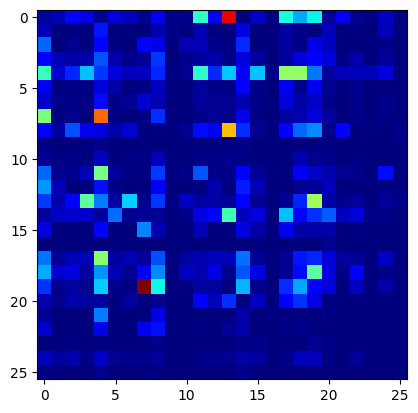

In [13]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)
print(bieng2)



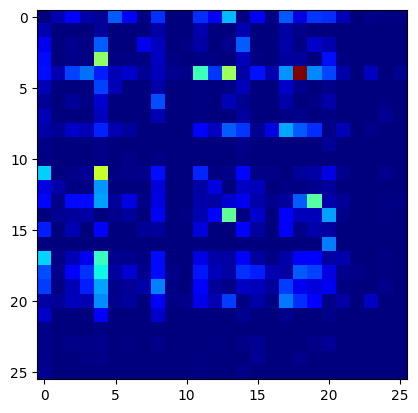

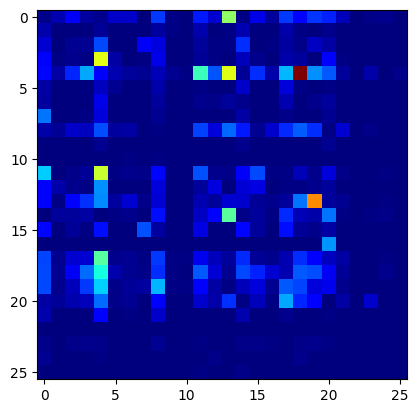

In [14]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()

bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [15]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(arg)

Explored the core reason on , why we divided ind by 26 and why did we take % on ind for j

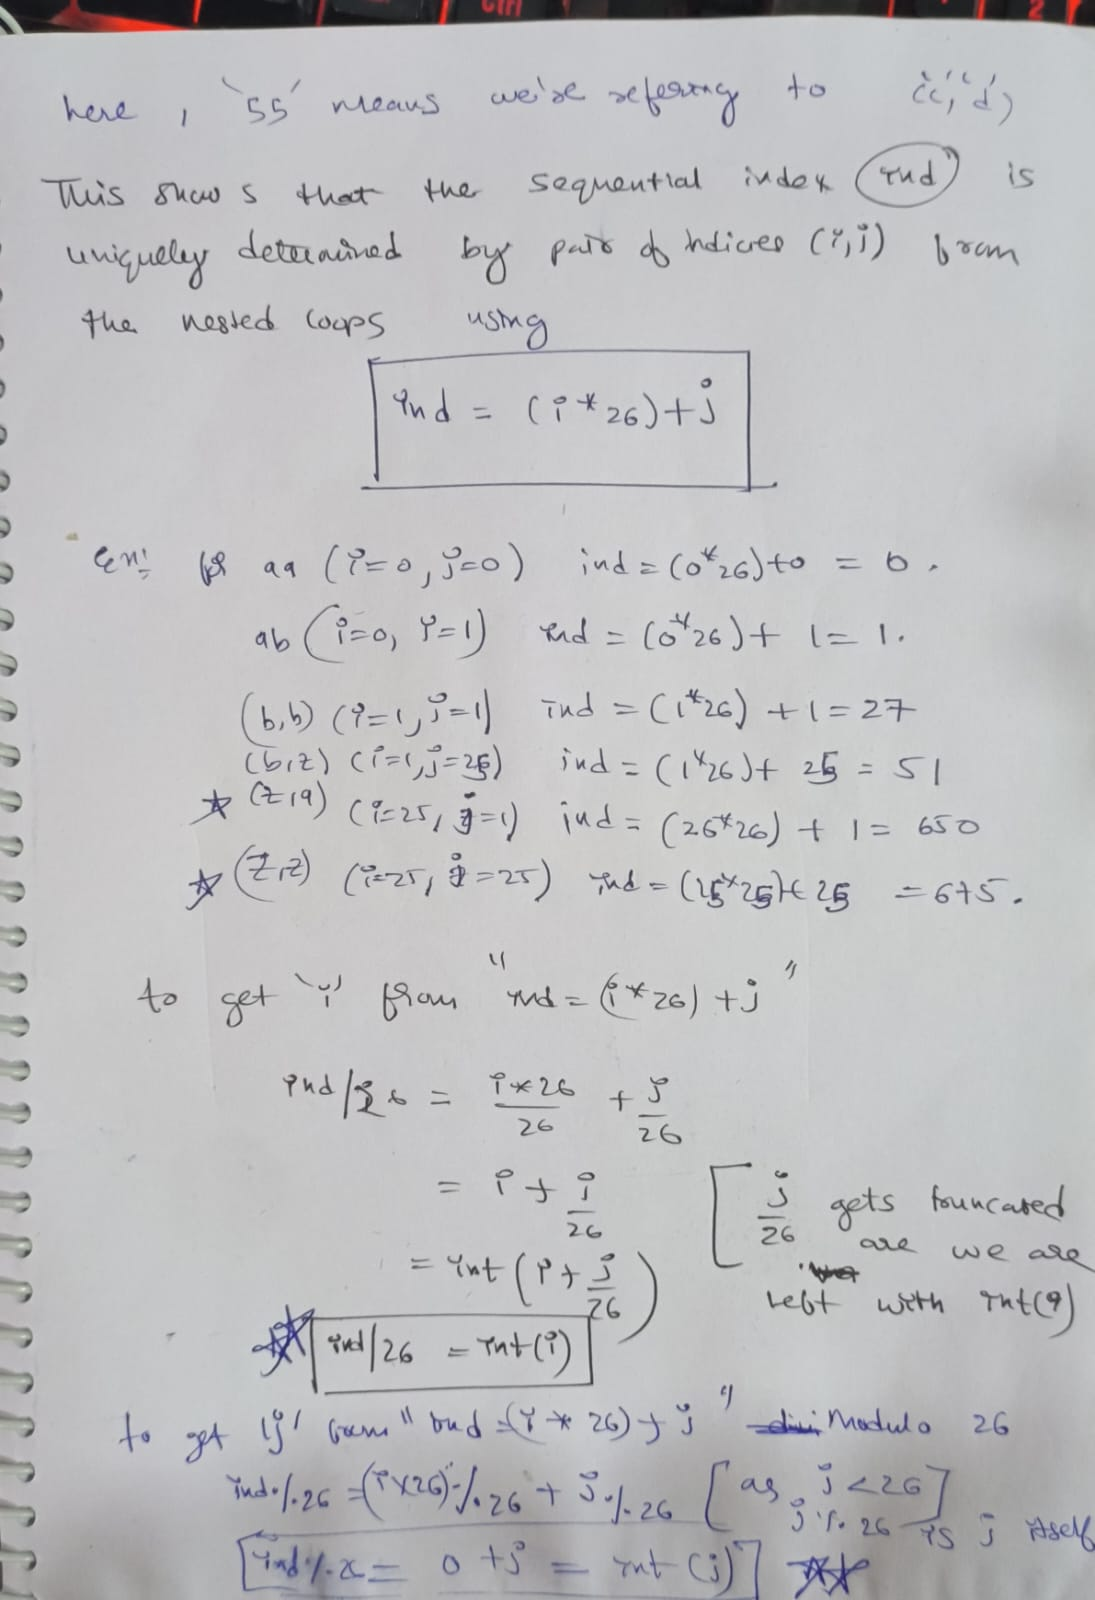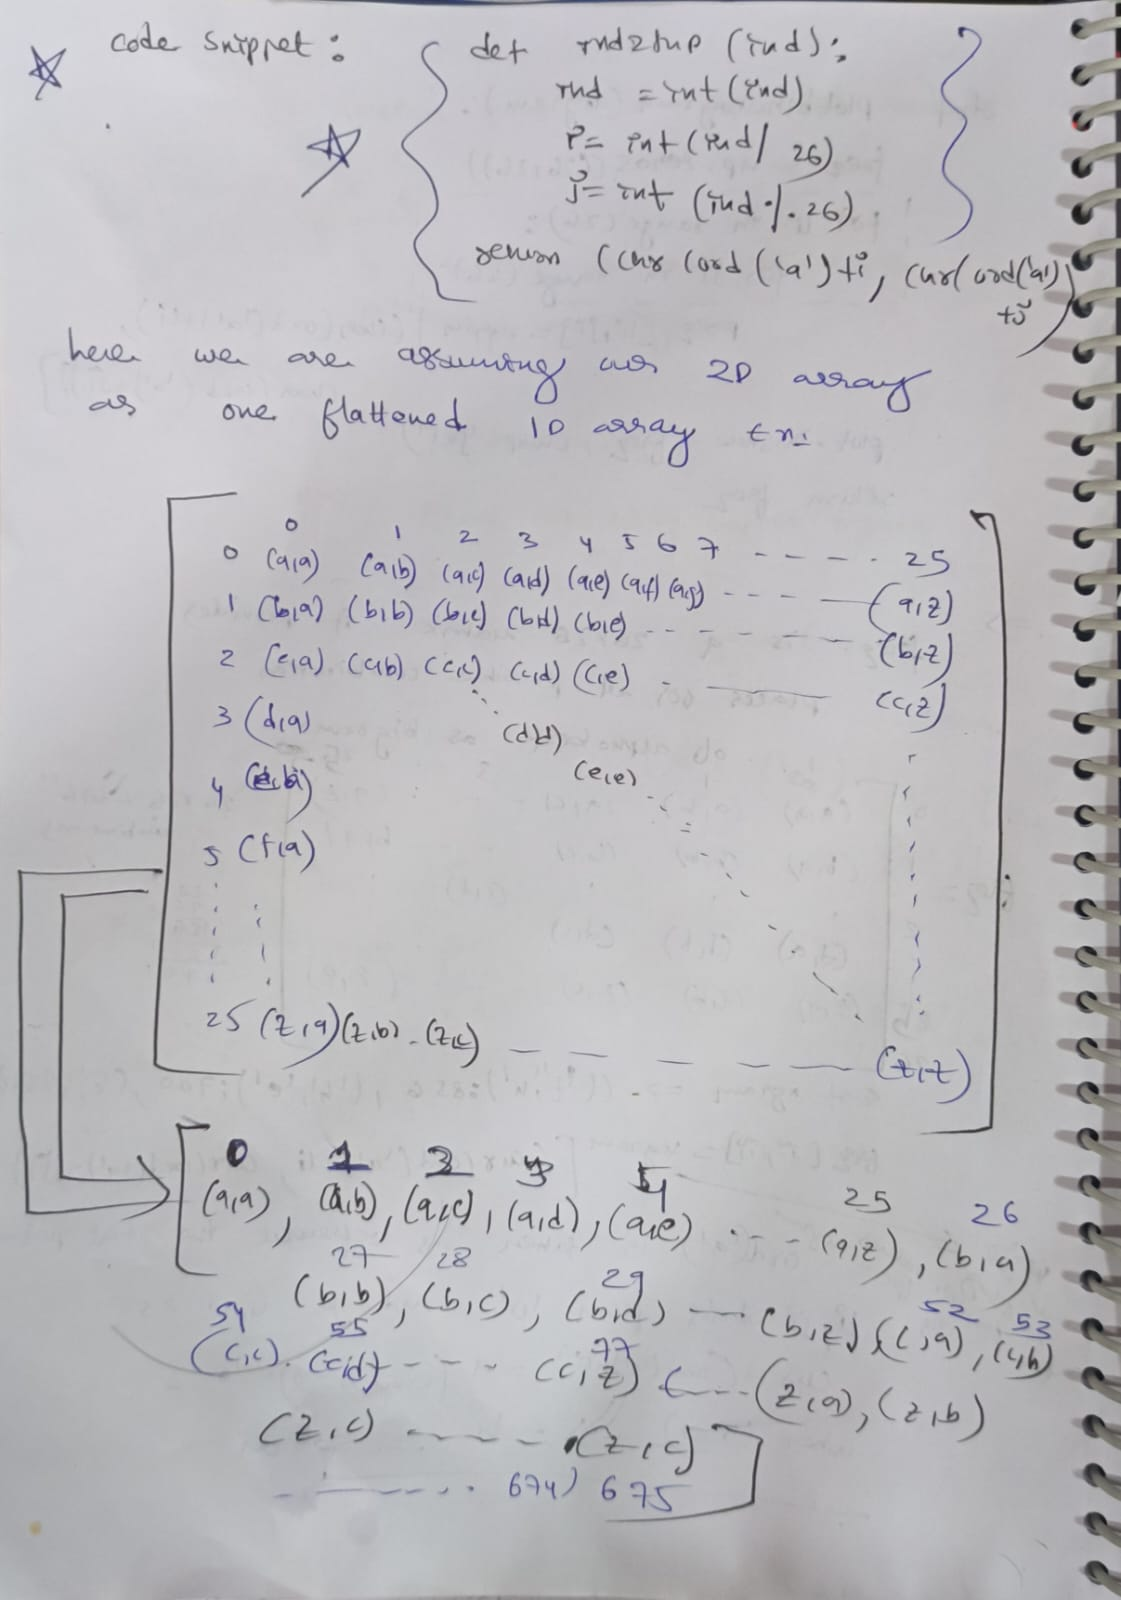

In [16]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
[501 186 122 221  13 121 446 442  11 341 487 377  19 104 344 117 502  17
 225 357 498 134 107 164 381 290 227   5 135 182 312 508 106 456 468 472
 550  18 226 476 369 342 384 286 482 512 123  52 338 294  66 210 450 222
 376 110 115 300  86 160 116 190  82 494 394 108 461 112 383 326  78 356
  97  59 297 486 537   2  30 316 310 483 460 144 212 219 346 196  60  56
 488 340 407 475 531 352 382 404 580 533 538   3 386 229 163 119 320 511
 118 390 109  71 147 490 513  62 214 367 470 379 554  21 105   8 208 375
  96 576 175   6  12 201 304 126 149 579 220  15  92  98 138 305 173 480
 469 156 130 366 455 211 624 125  37 514 378 539 532   1 111  43 445 535
 264 505 479 572 546 526 127 268 454 289 473 642 398 463 405  24 448 128
 466  40 516  34 327 409 174  83 522 444 643  26   4 462  72 518 474  79
 453 385  90 349 370 471  63 364 639 459 523 478 213  95  50 401 343 638
 313 260 324 307  89 586 306 485  80 447 102 521 496 374 162  46 332  81
 124 278 339 358  69 628 176 365 520 17

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

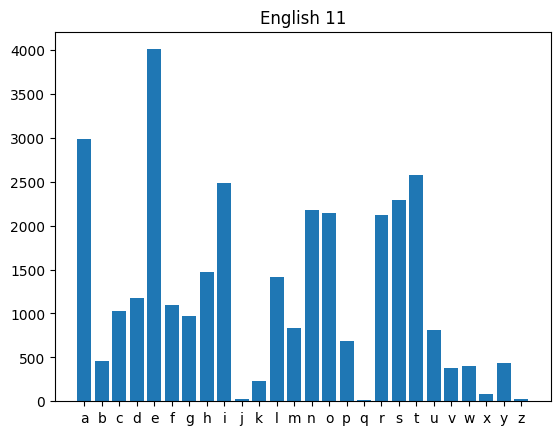

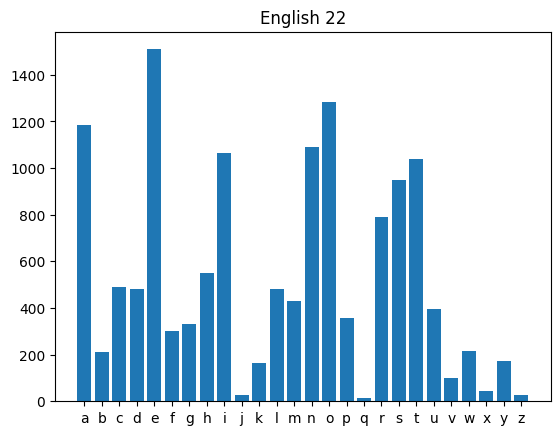

In [34]:
new_topic_1 = "Supercalifragilisticexpialidocious"
new_topic_2 = "Onomatopoeia"
wikipedia.set_lang('en')

eng11 = wikipedia.page(new_topic_1).content
eng22 = wikipedia.page(new_topic_2).content
eng11 = cleanup(eng11)
eng22 = cleanup(eng22)
unigram_eng11 = Counter(ngrams(eng11,1))
plothistogram(unigram_eng1)
plt.title('English 11')
plt.show()
unigram_eng22 = Counter(ngrams(eng22,1))
plothistogram(unigram_eng22)
plt.title('English 22')
plt.show()

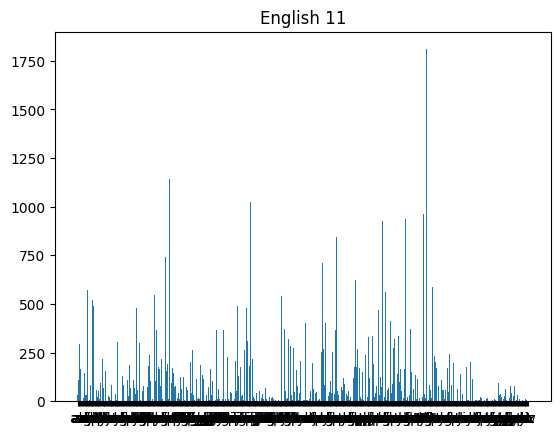

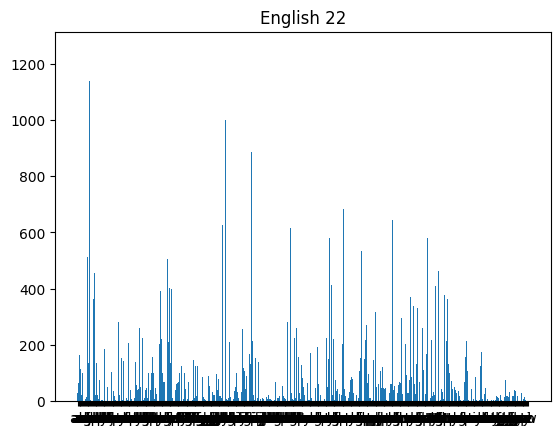

In [35]:
bigram_eng11 = Counter(ngrams(eng11,2)) # bigrams
plothistogram(bigram_eng11)
plt.title('English 11')
plt.show()

bigram_eng22 = Counter(ngrams(eng22,2))
plothistogram(bigram_eng2)
plt.title('English 22')
plt.show()

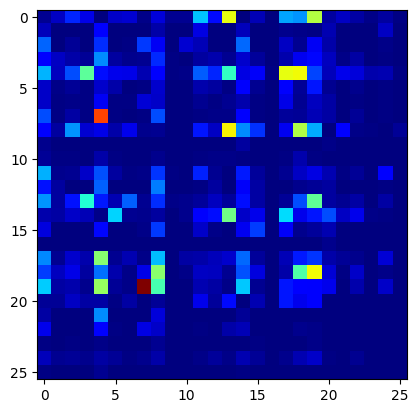

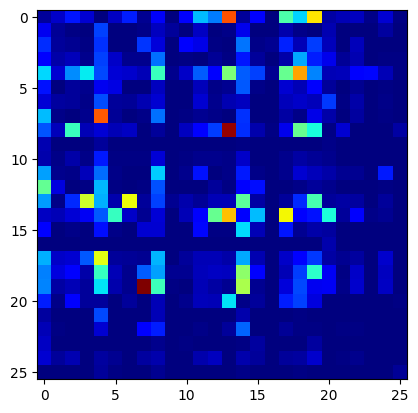

In [36]:
bieng11 = plotbihistogram(bigram_eng11)
plt.show()
bieng22 = plotbihistogram(bigram_eng22)

In [37]:
print('\nEnglish 11:')
ShowTopN(bieng11)
print('\nEnglish 22:')
ShowTopN(bieng22)


English 11:
[501 186 221 487 122  13 121  19 226 498 476 446 377 357 107 486 502 117
 341 381 369 494 508  11 450 104 286 227  17  18 338 210 222  82 550 442
 320 472 456  66  52 344 316 115 290 482 182 356 106 190 384 123 405 468
 398  59 461 294 223 346  56  86 116   2 297 300 460 342 383 537 149 219
 511 312 340 376 108 352 533  12  97 394 512  78 196  30 112 229 208 310
 144 147 576 513 375 539 326 119 407  71 160  60  96 225 404 214 572 379
 109 382 538 514 531 386 125 212   3 470 110 475 173 305 118  37 579 390
 483 126   8 554 466 488 163   6  62 211 138  92 134 444 455 378 401 366
   5 164 643 490 130 156 580 518 289 479  69  79 304  50 522 220   1  21
 385 480 105 350 175  98 469  40 454  26 624 124 586 459 367 201  15  63
  46 535 343 505 448 111 638 642 410 128 306 516  90 496 364 473  95 170
 127 141 445 278 453  34  80 585  72 264 135 462 485 632 213 362 176 546
 327 628 360 100 184 506 495 353 524 365  22 523 526 202 452 142  83 248
 358  24 324 291 209  89 471 372  20 3

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [17]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Extract a subset of the data for our experiment:

In [18]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]
no9 = train_X[train_y==9,:,:]
no8 = train_X[train_y==8,:,:]
print(no1.shape)
print(no0.shape)
print(no9.shape)

(6742, 28, 28)
(5923, 28, 28)
(5949, 28, 28)


Let us visualize a few images here:

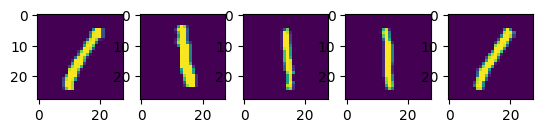

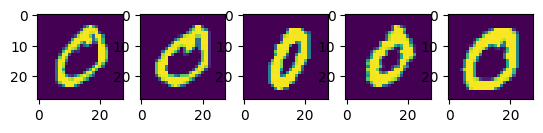

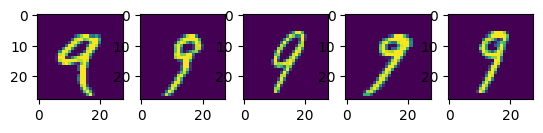

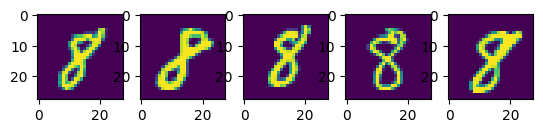

In [19]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no9[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no8[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [20]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))
sum9 = np.sum(no9>0, (1,2))
sum8 = np.sum(no8>0, (1,2))

print(sum1)
print(len(sum1))
print(sum0)
sum9 = np.sum(no9>0, (1,2))
print(sum9)

[96 93 68 ... 76 96 74]
6742
[176 198 183 ... 174 204 197]
[142 109 108 ... 132 133 119]


Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

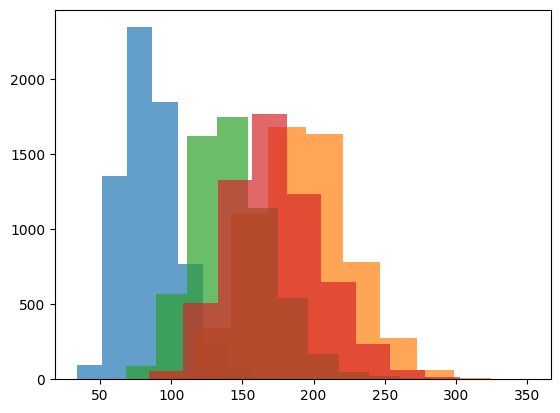

In [21]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);
plt.hist(sum9,alpha=0.7);
plt.hist(sum8,alpha=0.7);

The x-axis: This represents the "sum of active pixels". The range on this axis will likely cover the minimum and maximum pixel sums found in your sum1 and sum0 arrays. The axis will be divided into intervals called "bins".

The y-axis: This represents the frequency or count of images. The height of each bar in the histogram indicates how many images of a particular digit (either '1' or '0', depending on the color of the bar) have a pixel sum that falls within the range of the corresponding bin on the x-axis.

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [22]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)#top filled
  im2 = np.rot90(cumArray(np.rot90(img)), 3) #left filled # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)#bottom filled
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)#right filled
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

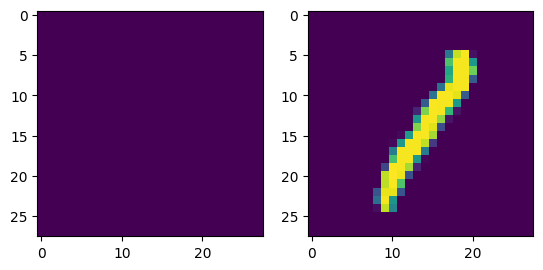

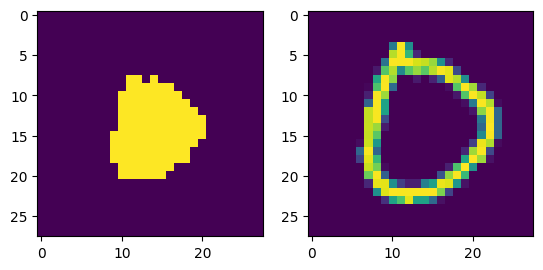

In [23]:
imgs = [no1[456,:,:],  no0[454,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

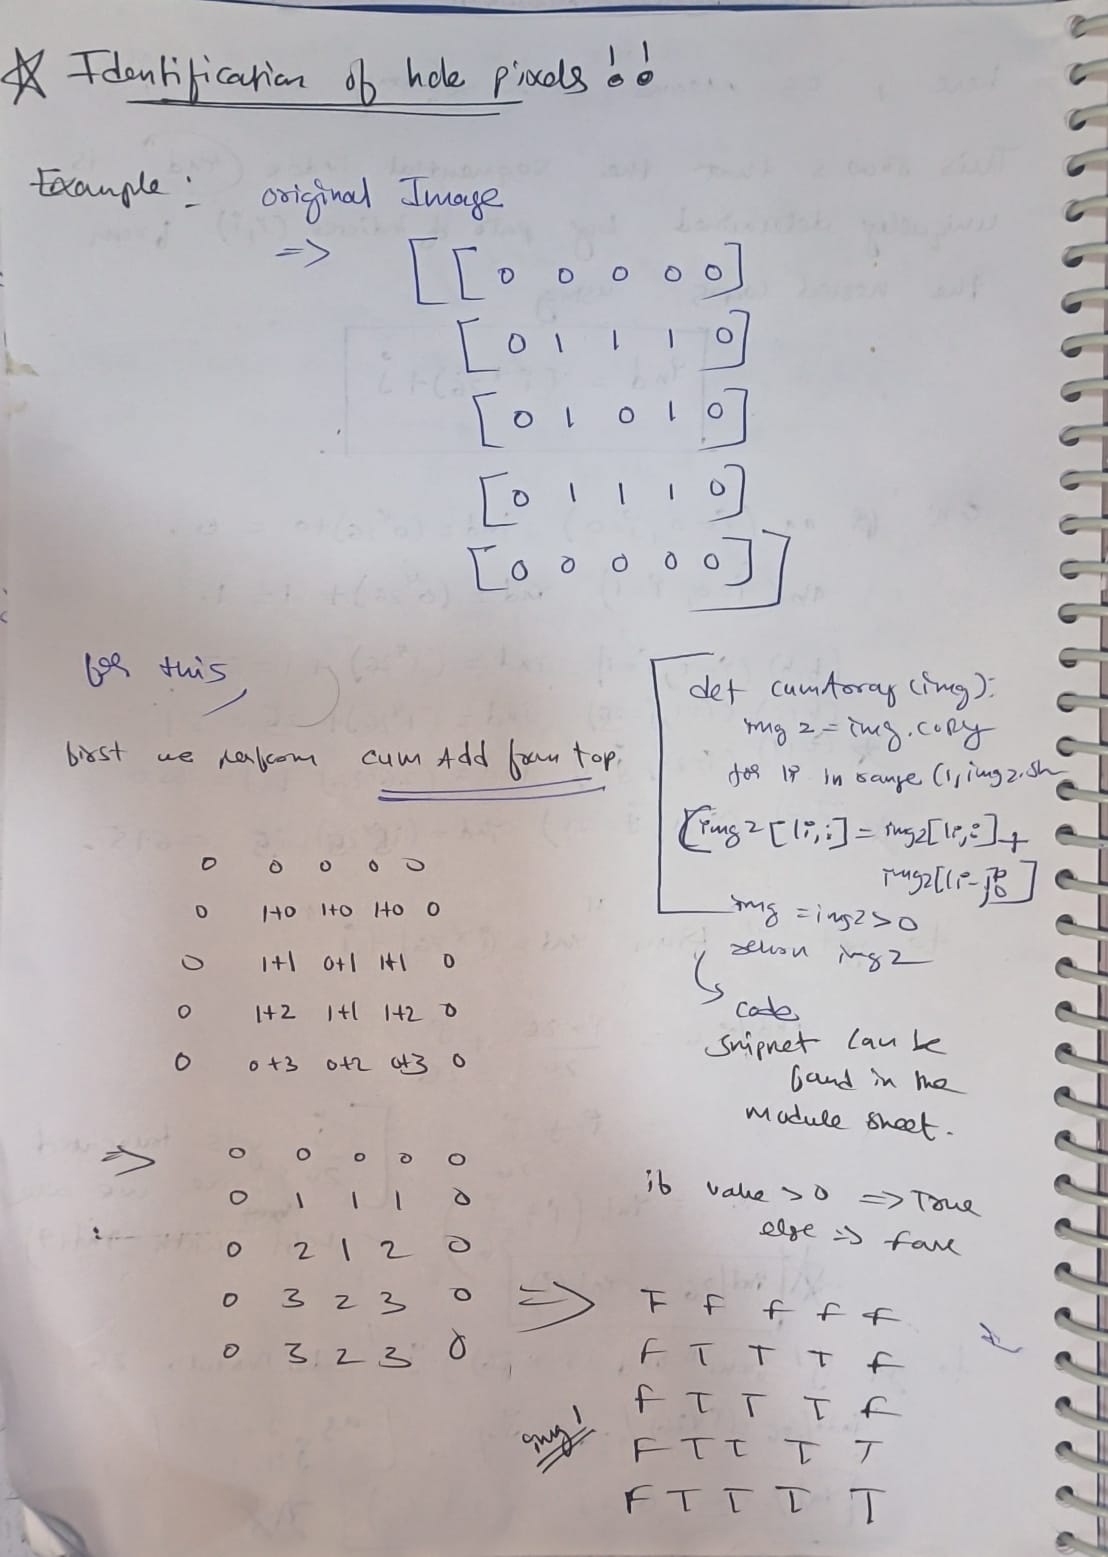

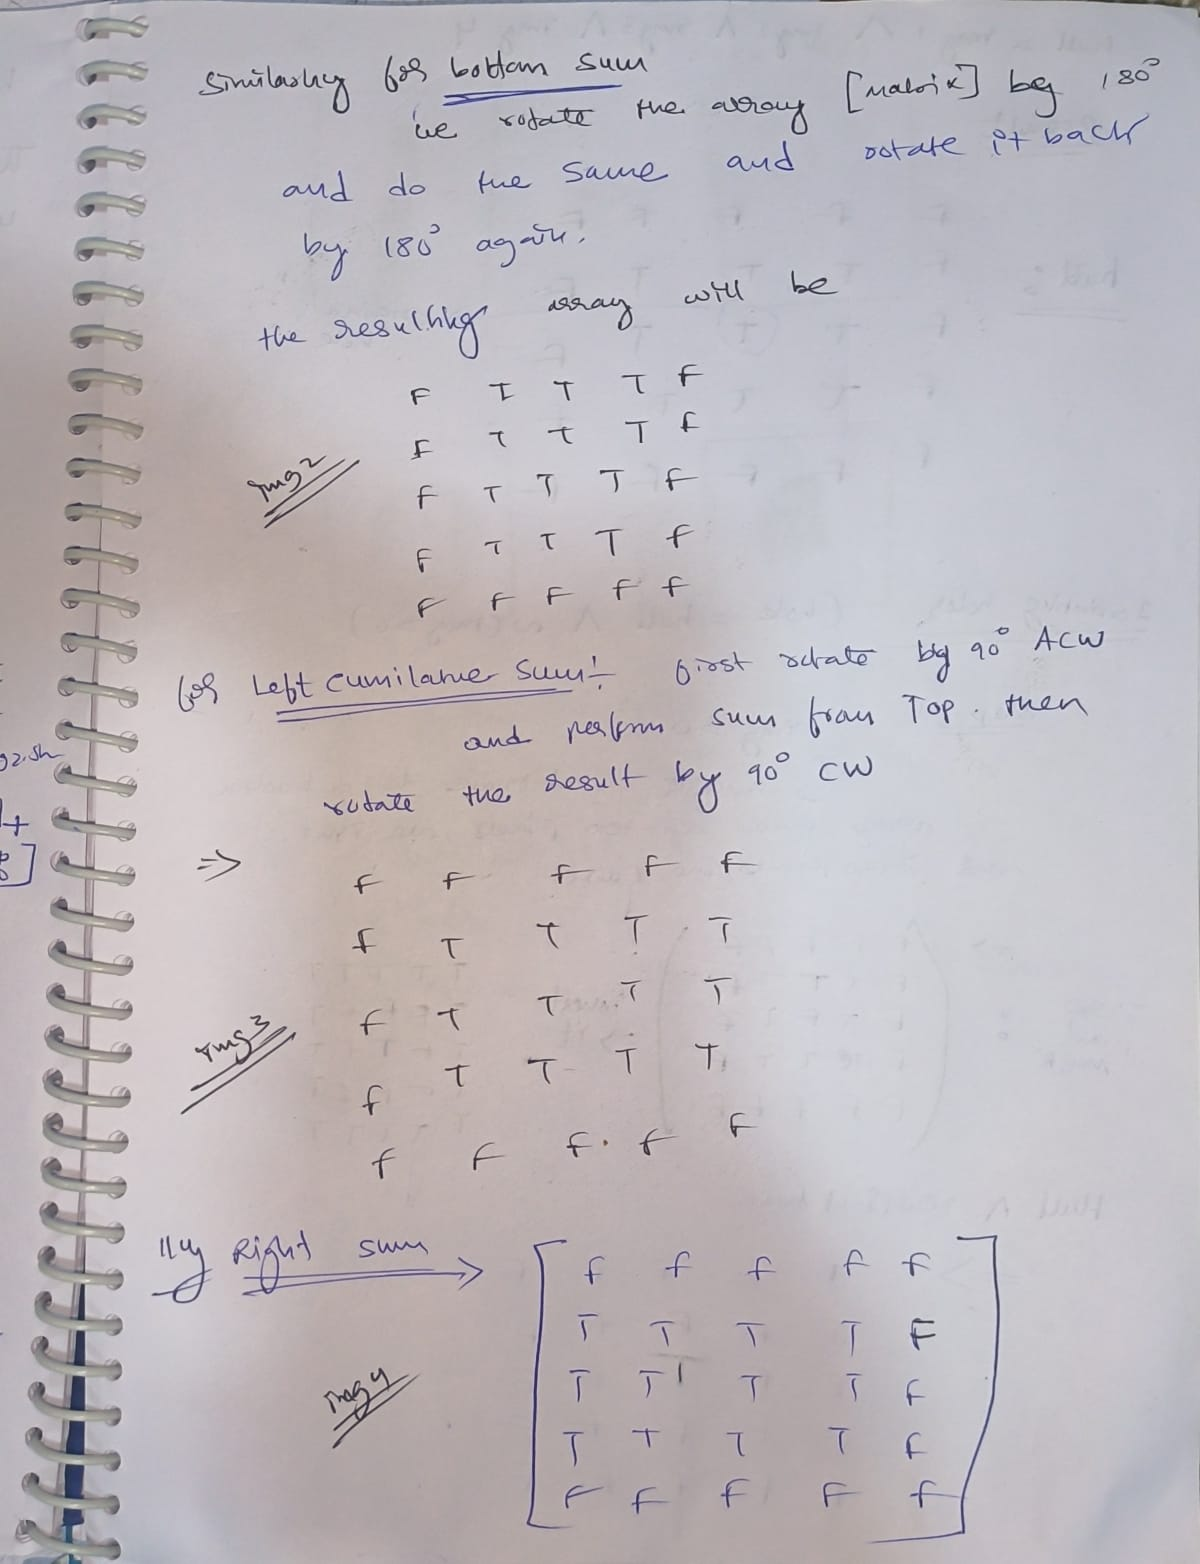

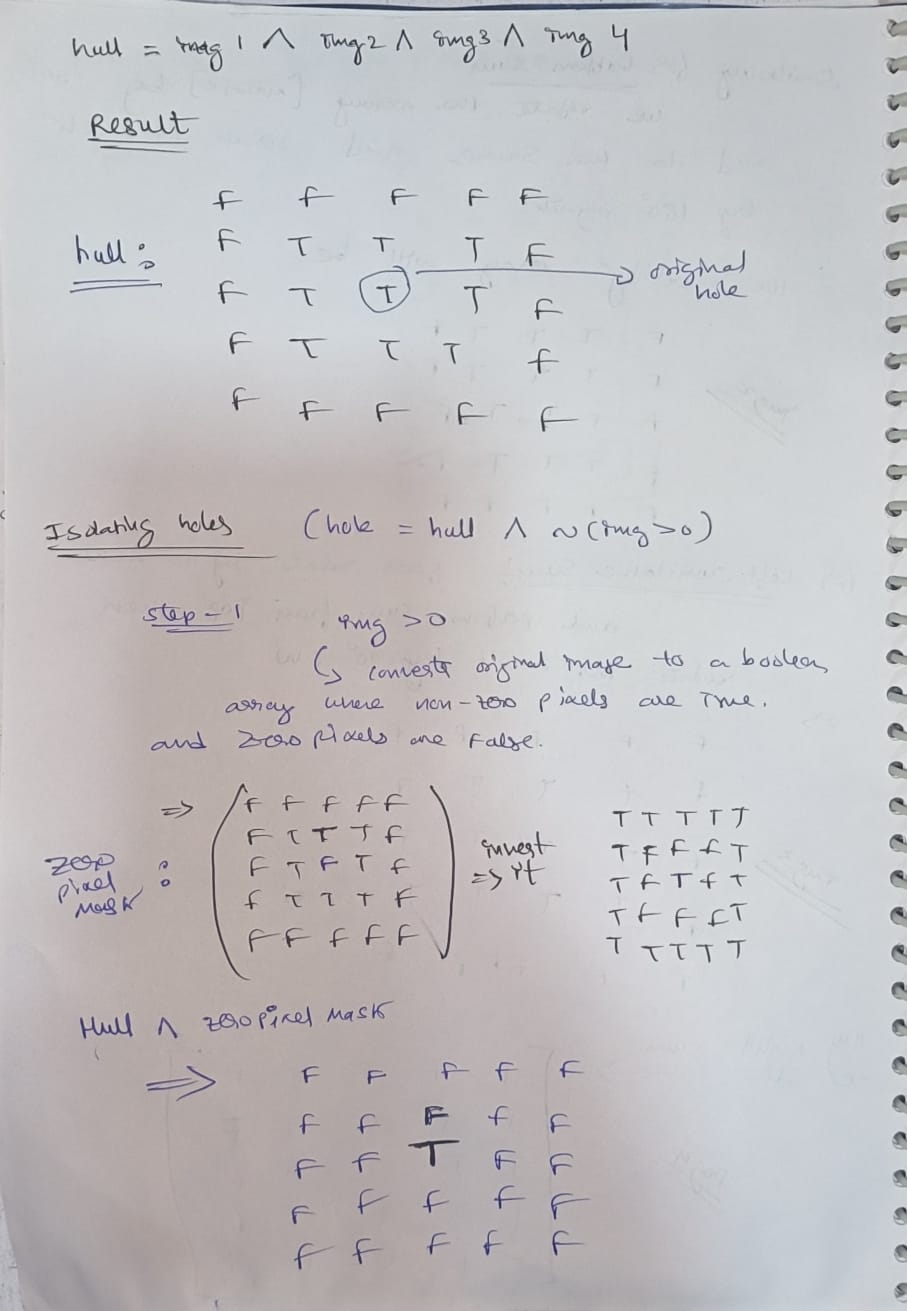

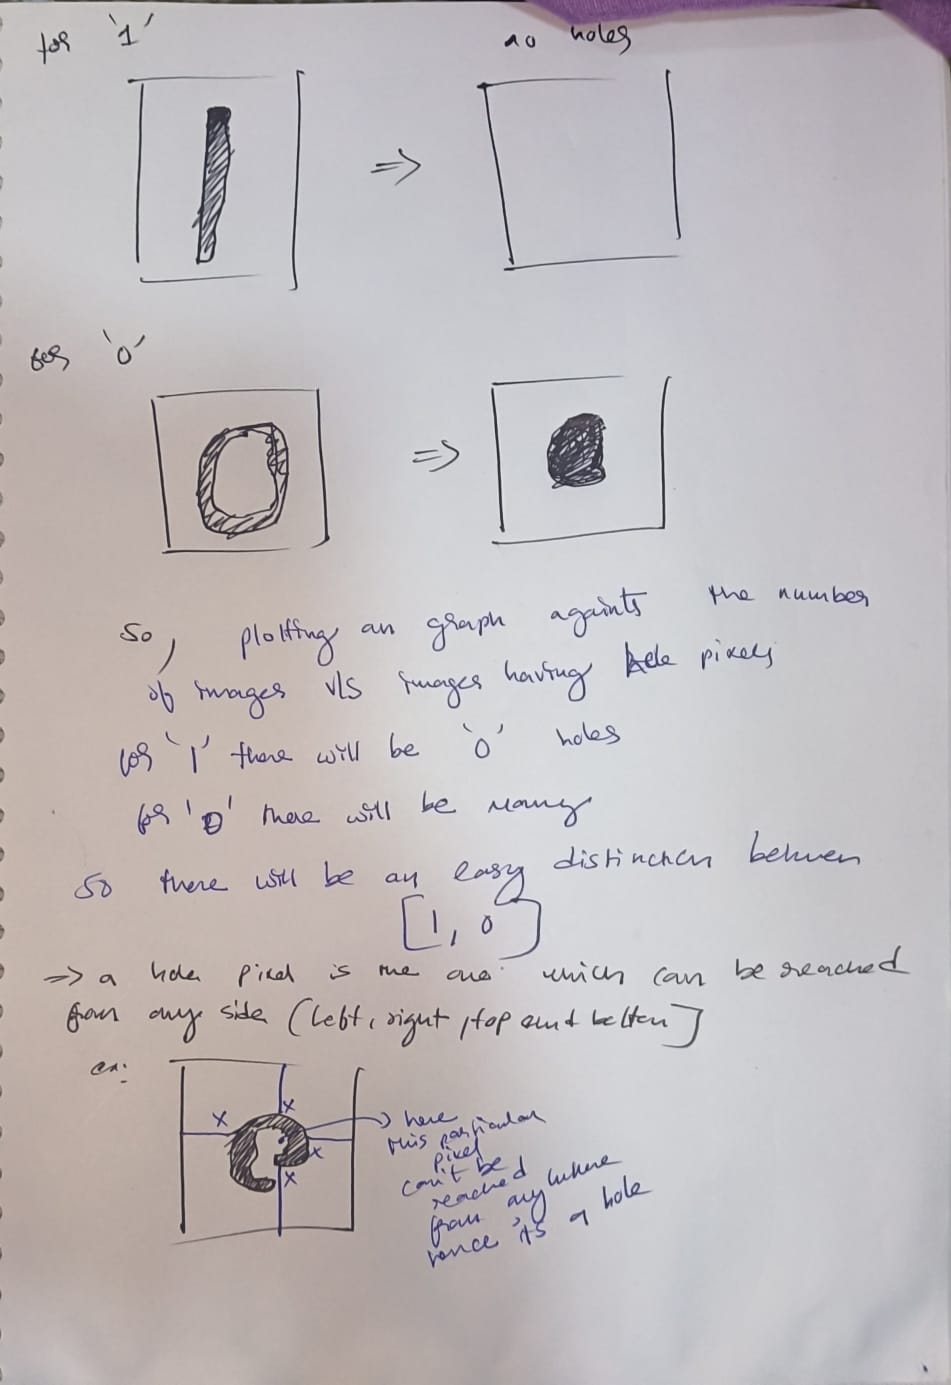

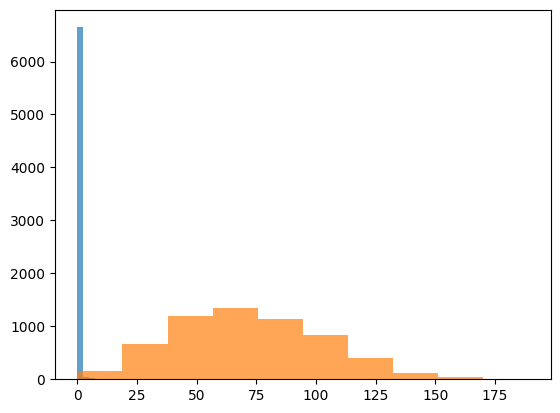

In [24]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [25]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

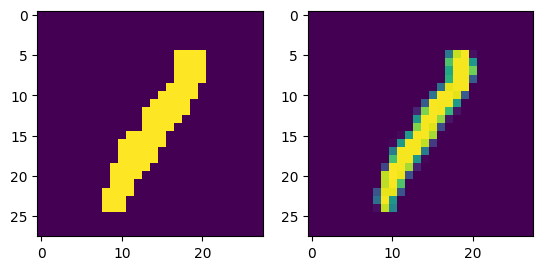

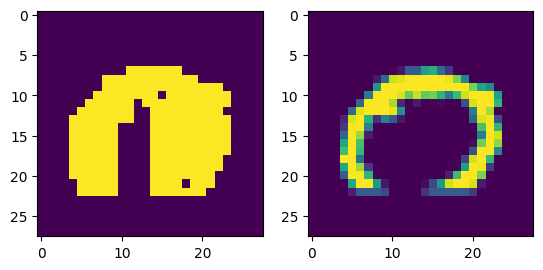

In [26]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

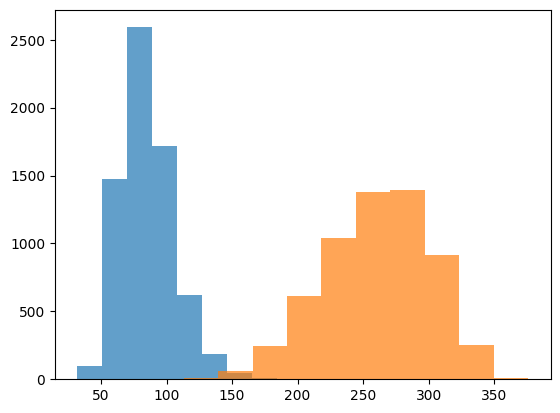

In [27]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [28]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

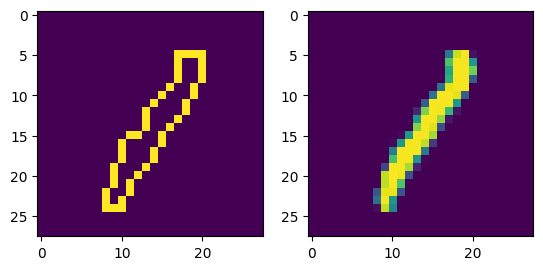

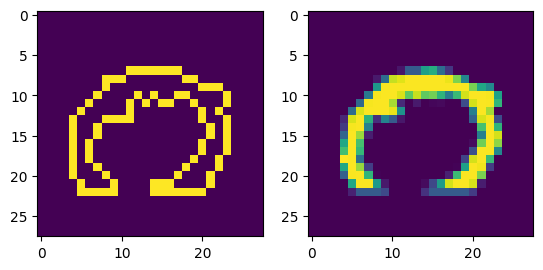

In [29]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

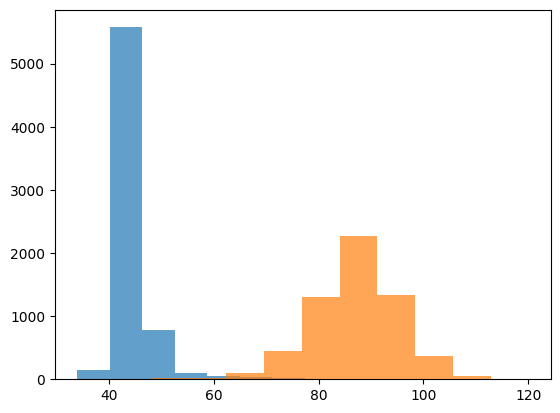

In [30]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

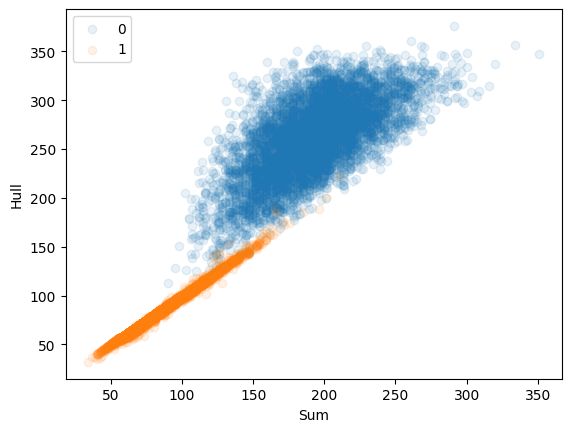

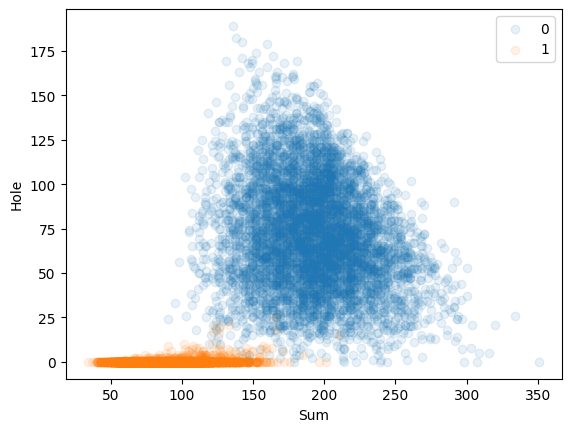

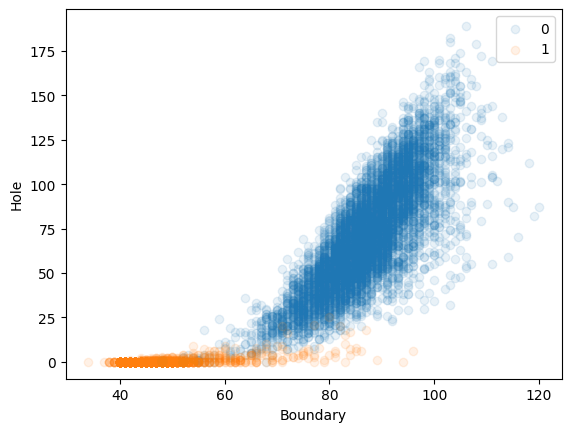

In [31]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [32]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

2.Gets the ratio of vowels in the text to non-vowels

In [39]:

def calculate_vowel_proportion(text):
  vowel_count = 0
  total_characters = 0
  vowels = 'aeiou'
  for char in text:
    total_characters += 1
    if char in vowels:
      vowel_count += 1
  if total_characters == 0:
    return 0.0
  return vowel_count / total_characters

# Calcululating the vowel proportions for the cleaned text
vowel_proportion_eng1 = calculate_vowel_proportion(eng1)
vowel_proportion_eng2 = calculate_vowel_proportion(eng2)
vowel_proportion_fr1 = calculate_vowel_proportion(fr1)
vowel_proportion_fr2 = calculate_vowel_proportion(fr2)
vowel_proportion_eng11 = calculate_vowel_proportion(eng11)
vowel_proportion_eng22 = calculate_vowel_proportion(eng22)

# Printing the results
print(f"Vowel proportion in English text 1: {vowel_proportion_eng1:.4f}")
print(f"Vowel proportion in English text 2: {vowel_proportion_eng2:.4f}")
print(f"Vowel proportion in French text 1: {vowel_proportion_fr1:.4f}")
print(f"Vowel proportion in French text 2: {vowel_proportion_fr2:.4f}")
print(f"Vowel proportion in English text 1: {vowel_proportion_eng11:.4f}")
print(f"Vowel proportion in English text 2: {vowel_proportion_eng22:.4f}")

Vowel proportion in English text 1: 0.3848
Vowel proportion in English text 2: 0.3811
Vowel proportion in French text 1: 0.4227
Vowel proportion in French text 2: 0.4040
Vowel proportion in English text 1: 0.3806
Vowel proportion in English text 2: 0.3968
